In [23]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

### Default settings with reduced complexity ( hidden-size = 1)

In [4]:
! python main.py --mode test --seed 100 --ID 0 --hidden-size 1 --episode-test 100

Jun-11 14:03:18.793 - Seed: 100
Jun-11 14:03:19.842 - Meta learner has been loaded
Jun-11 14:03:46.026 - Test (100 episode) - loss: 0.9765 +- 0.1658, acc: 61.120 +- 1.572%


In [7]:
### requires CUB dataset
#! python main_CUB.py --mode test --seed 75 --ID 4 --hidden-size 1 --episode-test 100

In [8]:
### requires Omniglot dataset
! python main_omniglot.py --mode test --seed 150 --ID 1 --hidden-size 1 --episode-test 100

Jun-11 14:05:54.606 - Seed: 150
Jun-11 14:05:55.690 - Meta learner has been loaded
Jun-11 14:06:08.439 - Test (100 episode) - loss: 0.2350 +- 0.2716, acc: 93.733 +- 1.216%


### Different Recurrent Structures

In [27]:
! python main.py --mode test --seed 100 --ID 36 --episode-test 100 --meta-learner sgd

Jun-11 14:14:52.498 - Seed: 100
Jun-11 14:14:53.516 - Meta learner has been loaded
Jun-11 14:15:18.981 - Test (100 episode) - loss: 1.0509 +- 0.1453, acc: 56.933 +- 1.611%


In [21]:
! python main.py --mode test --seed 100 --ID 4 --episode-test 100 --hidden-size 1 --meta-learner full-lstm

Jun-11 14:12:39.488 - Seed: 100
Jun-11 14:12:40.564 - Meta learner has been loaded
Jun-11 14:13:07.758 - Test (100 episode) - loss: 1.0974 +- 0.1520, acc: 55.013 +- 1.576%


In [22]:
! python main.py --mode test --seed 100 --ID 6 --episode-test 100 --hidden-size 1 --meta-learner gru

Jun-11 14:13:12.569 - Seed: 100
Jun-11 14:13:13.569 - Meta learner has been loaded
Jun-11 14:13:38.292 - Test (100 episode) - loss: 1.0726 +- 0.1486, acc: 57.133 +- 1.648%


### Without data augmentation

In [28]:
! python main.py --mode test --seed 100 --ID 13 --episode-test 100 --hidden-size 1

Jun-11 14:15:21.633 - Seed: 100
Jun-11 14:15:22.709 - Meta learner has been loaded
Jun-11 14:15:49.355 - Test (100 episode) - loss: 1.0272 +- 0.1492, acc: 58.080 +- 1.633%


### Cross-Domain Tests

#### Trained with Omniglot

In [29]:
! python main.py --mode test --seed 150 --ID 1 --hidden-size 1  --episode-test 100

Jun-11 14:18:31.130 - Seed: 150
Jun-11 14:18:32.178 - Meta learner has been loaded
Jun-11 14:18:58.536 - Test (100 episode) - loss: 4.3529 +- 1.6159, acc: 34.147 +- 1.494%


#### Trained with CUB

In [30]:
! python main.py --mode test --seed 75 --ID 4 --hidden-size 1 --episode-test 100

Jun-11 14:19:01.293 - Seed: 75
Jun-11 14:19:02.379 - Meta learner has been loaded
Jun-11 14:19:28.675 - Test (100 episode) - loss: 1.3923 +- 0.1183, acc: 42.373 +- 1.480%


### Learning Curves

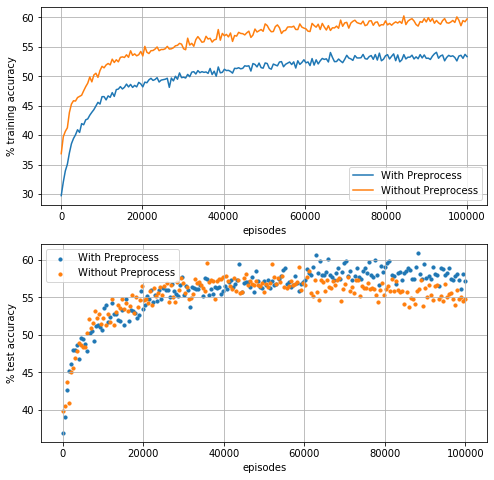

In [31]:
logs = ["log-100-0", "log-100-13"]
labels = ["With Preprocess", "Without Preprocess"]

test_freq = 500
smoothing = 1

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

for log_file, label in zip(logs, labels):
    with h5py.File("logs/" + log_file + "/hist.hdf5", "r") as file:
        data_train = np.array(file["train_hist"])
        data_test = np.array(file["test_hist"])

    train_arr = data_train[:, 1]
    test_arr = data_test[:, 2]

    test_len = smoothing * (len(test_arr) // smoothing)

    train_window_avg = np.mean(np.reshape(train_arr, (-1, test_freq*smoothing)), axis=1)
    test_window_avg = np.mean(np.reshape(test_arr[:test_len], (-1, smoothing)), axis=1)

    ax[0].plot(np.linspace(1,len(train_arr), len(train_window_avg)), train_window_avg, label=label)
    ax[1].scatter(np.linspace(1,len(train_arr), len(test_window_avg)), test_window_avg, s=10, label=label)

ax[0].set_xlabel("episodes")
ax[0].set_ylabel("% training accuracy")
ax[1].set_xlabel("episodes")
ax[1].set_ylabel("% test accuracy")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

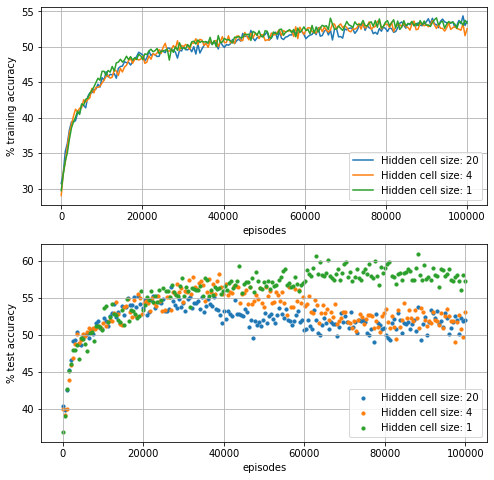

In [32]:
logs = ["log-100-1", "log-100-8", "log-100-0"]
labels = ["Hidden cell size: 20", "Hidden cell size: 4", "Hidden cell size: 1"]

test_freq = 500
smoothing = 1

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

for log_file, label in zip(logs, labels):
    with h5py.File("logs/" + log_file + "/hist.hdf5", "r") as file:
        data_train = np.array(file["train_hist"])
        data_test = np.array(file["test_hist"])

    train_arr = data_train[:, 1]
    test_arr = data_test[:, 2]

    test_len = smoothing * (len(test_arr) // smoothing)

    train_window_avg = np.mean(np.reshape(train_arr, (-1, test_freq*smoothing)), axis=1)
    test_window_avg = np.mean(np.reshape(test_arr[:test_len], (-1, smoothing)), axis=1)

    ax[0].plot(np.linspace(1,len(train_arr), len(train_window_avg)), train_window_avg, label=label)
    ax[1].scatter(np.linspace(1,len(train_arr), len(test_window_avg)), test_window_avg, s=10, label=label)

ax[0].set_xlabel("episodes")
ax[0].set_ylabel("% training accuracy")
ax[1].set_xlabel("episodes")
ax[1].set_ylabel("% test accuracy")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

